<a href="https://colab.research.google.com/github/kushjaggi/natural-language-processing/blob/master/MultilabelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    ! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py
    import setup_google_colab
    setup_google_colab.setup_week1() 
    
import sys
sys.path.append("..")
from common.download_utils import download_week1_resources

download_week1_resources()

--2020-11-19 06:45:11--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1939 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.89K  --.-KB/s    in 0s      

2020-11-19 06:45:11 (21.1 MB/s) - ‘setup_google_colab.py’ saved [1939/1939]



In [2]:
from grader import Grader
grader = Grader()

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from ast import literal_eval
import pandas as pd
import numpy as np
print("done")

done


In [6]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data
    print("done")
    

In [7]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')
print("done")

done


In [9]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [10]:
validation.iloc[4]['title']


'Getting error - type "json" does not exist - in Postgresql during rake db migrate'

In [11]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values
print("done")


done


In [12]:
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

print("done")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


done


In [13]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') 
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') # take all words that contain characters other than 0-9,a-z,#,+
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = # lowercase text
    text =text.lower()
    #text = # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)
    #text = # delete symbols which are in BAD_SYMBOLS_RE from text
    text =  re.sub(BAD_SYMBOLS_RE, '', text)
    #text = # delete stopwords from text
    token_word=word_tokenize(text)
    filtered_sentence = [w for w in token_word if not w in STOPWORDS] # filtered_sentence contain all words that are not in stopwords dictionary
    lenght_of_string=len(filtered_sentence)
    text_new=""
    for w in filtered_sentence:
        if w!=filtered_sentence[lenght_of_string-1]:
             text_new=text_new+w+" " # when w is not the last word so separate by whitespace
        else:
            text_new=text_new+w
            
    text = text_new
    return text
print("done")

done


In [14]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

print("done")

done


In [15]:
print(test_text_prepare())

Basic tests are passed.


In [16]:
prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)

grader.submit_tag('TextPrepare', text_prepare_results)
print("done")


Current answer for task TextPrepare is:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
done


In [17]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

print("done")

done


In [19]:
print(len(X_train))

import collections 
from collections import Counter
import re

words=[]
tag_w=[]
for i in range(0,100000):
    #print(i)
    words = words+(re.findall(r'\w+', X_train[i])) # words cantain all the words in the dataset
    tag_w=tag_w+y_train[i] # tage_w contain all tags that aree present in train dataset

print("done") 
words_counts = Counter(words) # counter create the dictinary of unique words with their frequncy
tag_counts=Counter(tag_w)
#print(words_counts)
#print(tag_counts)


100000
done


In [20]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = tag_counts
# Dictionary of all words from train corpus with their counts.
words_counts = Counter(words)
#print(tags_counts)
#print(tags_counts.keys())


#v={}
#for i in range(0,10):
#    v[most_common_words[i][0]]=i
    
#print(v)
#print(v['javascript'])

######################################
######### YOUR CODE HERE #############
######################################

In [21]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]


print(most_common_words)
grader.submit_tag('WordsTagsCount', '%s\n%s' % (','.join(tag for tag, _ in most_common_tags), 
                                                ','.join(word for word, _ in most_common_words)))

print("done")

[('using', 8241), ('c', 8145), ('php', 5587)]
Current answer for task WordsTagsCount is:
 javascript,c#,java
using,c,php...
done


In [22]:
DICT_SIZE = 5000
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:5000] #most_common_words contain 5000 words in sorted order of frequncy
WORDS_TO_INDEX={}
INDEX_TO_WORDS={}
for i in range(0,5000):
    WORDS_TO_INDEX[most_common_words[i][0]]=i   # most_common_words[i][0] means extracting ith word from the dictioaanry, words to index conatain the index value of the word
    INDEX_TO_WORDS[i]=most_common_words[i][0] # index to word conatain the word conrrespond to the index

#rt={'hi': 0, 'you': 1, 'me': 2, 'are': 3}
#for key, value in rt.items():
 #   if key=='hi':
  #      print(key)
   # else:
    #    print("not e")


#examples = ['hi how are you']
#answers = [[1, 1, 0, 1]]
#for ex, ans in zip(examples, answers):
#        print("string is :")
        

#y=ex.split(" ")
#print(y)
#print(len(y))
#print(y[len(y)-1])

#result_vector = np.zeros(4)
#ex='hi how are you'
#y=ex.split(" ")
#for i in range(0,len(y)):
 #     for key,value in rt.items():
  #        #  print(y[i])
   #        # print(key)
    #        if y[i]==key:
     #           result_vector[rt[key]]=result_vector[rt[key]]+1
#print(result_vector)
#INDEX_TO_WORDS = ####### YOUR CODE HERE #######
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    y=text.split(" ")
    for i in range(0,len(y)):
        for key,value in words_to_index.items():
            if y[i]==key:
                result_vector[words_to_index[key]]=result_vector[words_to_index[key]]+1  #  result_vector[words_to_index[key]] conatin the count of the presence of  word in the text
            
    return result_vector # result vector is the vector of the size of the no of words taken as features having count of then in the text

print("dsf")

dsf


In [71]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [23]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [24]:
print(test_my_bag_of_words())

Basic tests are passed.


In [25]:
from scipy import sparse as sp_sparse

In [26]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


In [27]:
row = X_train_mybag[10].toarray()[0]
non_zero_elements_count=0
for i in range(0,5000):
    if (row[i]==1):
        non_zero_elements_count=non_zero_elements_count+1
    

print(non_zero_elements_count)
#non_zero_elements_count = ####### YOUR CODE HERE #######

grader.submit_tag('BagOfWords', str(non_zero_elements_count))

6
Current answer for task BagOfWords is:
 6...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(X_train[:3])

['draw stacked dotplot r', 'mysql select records datetime field less specified value', 'terminate windows phone 81 app']


In [30]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    tfidf_vectorizer =  TfidfVectorizer(min_df=5,max_df=0.9,ngram_range=(1,2),token_pattern= '(\S+)')#  '(\S+)'  means any no white space
    X_train=tfidf_vectorizer.fit_transform(X_train)
    X_val=tfidf_vectorizer.transform(X_val)
    X_test=tfidf_vectorizer.transform(X_test)
    ######################################
    ######### YOUR CODE HERE #############
    #######################################
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_

#tfidf_vectorizer.vocabulary_ returns just index of feature
    

In [31]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [32]:
######### YOUR CODE HERE #############
#print(X_train_tfidf[2])
print('X_test_tfidf ', X_test_tfidf.shape) 
print('X_val_tfidf ',X_val_tfidf.shape)

X_test_tfidf  (20000, 18026)
X_val_tfidf  (30000, 18026)


In [33]:
######### YOUR CODE HERE #############
print(tfidf_vocab)

{'draw': 4672, 'stacked': 14705, 'r': 12538, 'mysql': 10223, 'select': 13797, 'records': 12798, 'datetime': 3976, 'field': 5686, 'less': 8922, 'specified': 14567, 'value': 16867, 'mysql select': 10256, 'select records': 13831, 'datetime field': 3980, 'terminate': 15462, 'windows': 17578, 'phone': 11523, '81': 335, 'app': 971, 'windows phone': 17601, 'phone 81': 11526, '81 app': 336, 'get': 6532, 'current': 3623, 'time': 15643, 'specific': 14522, 'country': 3431, 'via': 17153, 'jquery': 8499, 'get current': 6563, 'current time': 3639, 'time specific': 15670, 'via jquery': 17167, 'configuring': 3050, 'tomcat': 15731, 'use': 16415, 'ssl': 14691, 'awesome': 1449, 'nested': 10378, 'set': 14098, 'plugin': 11801, 'add': 506, 'new': 10442, 'children': 2502, 'tree': 15809, 'various': 17104, 'levels': 8935, 'add new': 552, 'create': 3453, 'map': 9519, 'json': 8620, 'response': 13187, 'ruby': 13476, 'rails': 12567, '3': 238, 'json response': 8648, 'ruby rails': 13491, 'rails 3': 12569, 'rspec': 1

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

In [35]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train) # it chnage the y_train in feature form like alll clases with 0,1 value
y_val = mlb.fit_transform(y_val)

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [37]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
    model=OneVsRestClassifier(LogisticRegression()).fit(X_train,y_train)
    
    return model

    ######################################
    ######### YOUR CODE HERE #############
    ######################################   
    
print('X_test_tfidf ', X_test_tfidf.shape) 
print('X_val_tfidf ',X_val_tfidf.shape)

X_test_tfidf  (20000, 18026)
X_val_tfidf  (30000, 18026)


In [42]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag) #y_val_predicted_labels_mybag is in the same format of y_train
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [43]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf) # just opposite of tranform means it will give the name of classes rather than 0,1 in classes
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(10):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))


Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails


Title:	sessions sinatra used pass variable
True labels:	ruby,session
Predicted labels:	


Title:	getting error type json exist postgresql rake db migrate
True labels:	json,ruby,ruby-on-rails
Predicted labels:	ruby-on-rails


Title:	library found
True labels:	c++,ios,iphone,xcode
Predicted labels:	


Title:	csproj file programmatic adding deleting files
True labels:	c#
Predicted labels:	


Title:	typeerror makedirs got unexpected keyword argument exists_ok
True labels:	django,python
Predicted labels:	python


Title:	pan div using jquery
True labels:	html,javascript,jquery
Predicted labels:	javascript,jquery


Title:	hibernate intermediate advanced tutorials
True labels:	hibernate,java
Predicted labe

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [45]:
def print_evaluation_scores(y_val, predicted):
    accuracy=accuracy_score(y_val, predicted)
    f1_score_macro=f1_score(y_val, predicted, average='macro')
    f1_score_micro=f1_score(y_val, predicted, average='micro')
    f1_score_weighted=f1_score(y_val, predicted, average='weighted')
    precision_macro=average_precision_score(y_val, predicted, average='macro')
    precision_micro=average_precision_score(y_val, predicted, average='micro')
    precision_weighted=average_precision_score(y_val, predicted, average='weighted')
    print(accuracy,f1_score_macro,f1_score_micro,f1_score_weighted,precision_macro,precision_micro,precision_weighted)

In [46]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
0.34213333333333334 0.4996273252819668 0.6573433877133249 0.6341119124480885 0.3391707374450361 0.4635543548111985 0.49415662982269815
Tfidf
0.3336 0.44407978273018506 0.6403523186643442 0.6128324936071488 0.3006076175169872 0.4552318521948679 0.4835712637541087


In [47]:
from metrics import roc_auc
%matplotlib inline

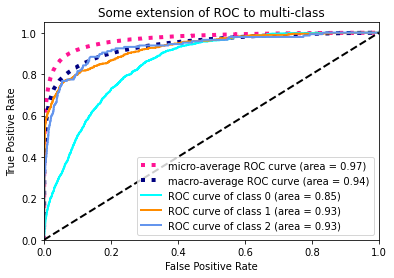

In [48]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

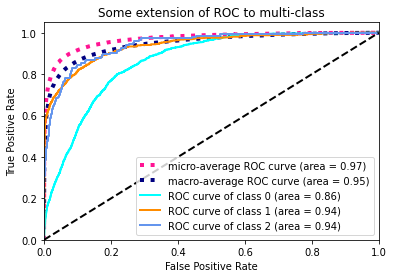

In [49]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

In [59]:
from sklearn.pipeline import make_pipeline
print("done") 
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
   # pipe = make_pipeline( LogisticRegression(penalty="l1"),OneVsRestClassifier(LogisticRegression(penalty="l2")))
    #model=pipe.fit(X_train, y_train)     
    model=OneVsRestClassifier(LogisticRegression(penalty='l1',C=1,solver='liblinear')).fit(X_train,y_train)
    
    return model

print("done1")    

classifier_mybag = train_classifier(X_train_mybag, y_train)
#classifier_tfidf = train_classifier(X_train_tfidf, y_train)
print("done2")
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
#y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)
print("done3")
#y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
#y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    accuracy=accuracy_score(y_val, predicted)
    f1_score_macro=f1_score(y_val, predicted, average='macro')
    f1_score_micro=f1_score(y_val, predicted, average='micro')
    f1_score_weighted=f1_score(y_val, predicted, average='weighted')
    precision_macro=average_precision_score(y_val, predicted, average='macro')
    precision_micro=average_precision_score(y_val, predicted, average='micro')
    precision_weighted=average_precision_score(y_val, predicted, average='weighted')
    print(accuracy,f1_score_macro,f1_score_micro,f1_score_weighted,precision_macro,precision_micro,precision_weighted)

print("done4")    
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
#print('Tfidf')
#print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

done
done1
done2
done3
done4
Bag-of-words
0.3476 0.5110341521584254 0.6637483183276415 0.6408058847285402 0.34885043459014015 0.4699059405589153 0.5007572858055691


In [60]:
test_predictions = classifier_mybag.predict(X_test_mybag)
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions_for_submission = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))
grader.submit_tag('MultilabelClassification', test_predictions_for_submission)

Current answer for task MultilabelClassification is:
 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json,web-services
7	java,...


In [75]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    est = classifier.estimators_[tags_classes.index(tag)]
    top_positive_words = [index_to_words[index] for index in est.coef_.argsort().tolist()[0][-5:]]  # top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[index] for index in est.coef_.argsort().tolist()[0][:5]] # bottom-5 words  sorted by the coefficients.
    
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [76]:
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)


Tag:	c
Top positive words:	printf, fscanf, malloc, scanf, c
Top negative words:	c #, php, javascript, java, python

Tag:	c++
Top positive words:	stl, mfc, qt, boost, c++
Top negative words:	php, java, javascript, python, jquery

Tag:	linux
Top positive words:	address, system call, ubuntu, signal, linux
Top negative words:	#, javascript, jquery, aspnet, array



In [77]:
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,c,php...
Task BagOfWords:
 6...
Task MultilabelClassification:
 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json,web-services
7	java,...


In [79]:
STUDENT_EMAIL = "truelykush@gmail.com" 
STUDENT_TOKEN = "IuRLbFbXKvAvLKi2"
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date...
Task WordsTagsCount:
 javascript,c#,java
using,c,php...
Task BagOfWords:
 6...
Task MultilabelClassification:
 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json,web-services
7	java,...


In [80]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
